In [1]:
!pip install apyori

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
%matplotlib inline

In [3]:
dataset = pd.read_csv('F:/dataset/association/primary-tumor.data')


In [4]:
dataset.head()

,1,1.1,1.2,?,3,2,2.1,1.3,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,2.10,2.11
0,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2


In [5]:
dataset.rename({'1': 'class','1.1': 'age', '1.2': 'sex','?': 'histologic-type','3': 'degree-of-diffe','2': 'bone','2.1': 'bone-marrow','1.3': 'lung',
           '2.2':  'pleura','2.3': 'peritoneum','2.4': 'liver','2.5': 'brain','2.6': 'skin','2.7': 'neck',
           '2.8': 'supraclavicular','2.9': 'axillar','2.10': 'mediastinum','2.11': 'abdominal'}, axis=1,inplace=True)

In [6]:
dataset

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,22,2,2,2,?,2,2,2,2,2,2,2,2,2,2,1,2,2
334,22,2,2,2,?,2,2,2,2,2,2,2,2,2,2,1,2,2
335,22,2,2,?,?,1,2,2,2,2,2,2,2,2,1,1,2,2
336,22,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            338 non-null    int64 
 1   age              338 non-null    int64 
 2   sex              338 non-null    object
 3   histologic-type  338 non-null    object
 4   degree-of-diffe  338 non-null    object
 5   bone             338 non-null    int64 
 6   bone-marrow      338 non-null    int64 
 7   lung             338 non-null    int64 
 8   pleura           338 non-null    int64 
 9   peritoneum       338 non-null    int64 
 10  liver            338 non-null    int64 
 11  brain            338 non-null    int64 
 12  skin             338 non-null    int64 
 13  neck             338 non-null    int64 
 14  supraclavicular  338 non-null    int64 
 15  axillar          338 non-null    int64 
 16  mediastinum      338 non-null    int64 
 17  abdominal        338 non-null    in

In [8]:
Dataset = dataset.drop(['class','age','sex', 'histologic-type', 'degree-of-diffe'], axis = 1)

In [9]:
Dataset

,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,2,2,2,2,2,1,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2,2,2,2,2,2,2,2,2,2,1,2,2
334,2,2,2,2,2,2,2,2,2,2,1,2,2
335,1,2,2,2,2,2,2,2,2,1,1,2,2
336,2,2,2,2,2,2,2,2,1,1,1,2,2


In [10]:
Dataset['bone'] = Dataset['bone'].replace([1,2],['Yes','No'])
Dataset['bone-marrow'] = Dataset['bone-marrow'].replace([1,2],['Yes','No'])
Dataset['lung'] = Dataset['lung'].replace([1,2],['Yes','No'])
Dataset['pleura'] = Dataset['pleura'].replace([1,2],['Yes','No'])
Dataset['peritoneum'] = Dataset['peritoneum'].replace([1,2],['Yes','No'])
Dataset['liver'] = Dataset['liver'].replace([1,2],['Yes','No'])
Dataset['brain'] = Dataset['brain'].replace([1,2],['Yes','No'])
Dataset['skin'] = Dataset['skin'].replace([1,2],['Yes','No'])
Dataset['neck'] = Dataset['neck'].replace([1,2],['Yes','No'])
Dataset['supraclavicular'] = Dataset['supraclavicular'].replace([1,2],['Yes','No'])
Dataset['axillar'] = Dataset['axillar'].replace([1,2],['Yes','No'])
Dataset['mediastinum'] = Dataset['mediastinum'].replace([1,2],['Yes','No'])
Dataset['abdominal'] = Dataset['abdominal'].replace([1,2],['Yes','No'])

In [11]:
Dataset

,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No
1,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No
2,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No
3,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No
4,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,No,No,No,No,No,No,No,No,No,No,Yes,No,No
334,No,No,No,No,No,No,No,No,No,No,Yes,No,No
335,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,No
336,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No


In [12]:
Dataset.iloc[:,9].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
Dataset['bone'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
Dataset.iloc[:,1].value_counts()

No     331
Yes      7
Name: bone-marrow, dtype: int64

In [15]:
Dataset.iloc[:,2].value_counts()

No     264
Yes     74
Name: lung, dtype: int64

In [16]:
Dataset.iloc[:,3].value_counts()

No     263
Yes     75
Name: pleura, dtype: int64

In [17]:
Dataset.iloc[:,4].value_counts()

No     243
Yes     95
Name: peritoneum, dtype: int64

In [18]:
Dataset.iloc[:,5].value_counts()

No     229
Yes    109
Name: liver, dtype: int64

In [19]:
Dataset.iloc[:,6].value_counts()

No     317
Yes     21
Name: brain, dtype: int64

In [20]:
Dataset.iloc[:,7].value_counts()

No     317
Yes     21
Name: skin, dtype: int64

In [21]:
Dataset.iloc[:,8].value_counts()

No     294
Yes     44
Name: neck, dtype: int64

In [22]:
Dataset.iloc[:,9].value_counts()

No     277
Yes     61
Name: supraclavicular, dtype: int64

In [23]:
Dataset.iloc[:,10].value_counts()

No     305
Yes     33
Name: axillar, dtype: int64

In [24]:
Dataset.iloc[:,11].value_counts()

No     246
Yes     92
Name: mediastinum, dtype: int64

In [25]:
Dataset.iloc[:,12].value_counts()

No     223
Yes    115
Name: abdominal, dtype: int64

In [26]:
dataset.iloc[:,13].value_counts()

2    294
1     44
Name: neck, dtype: int64

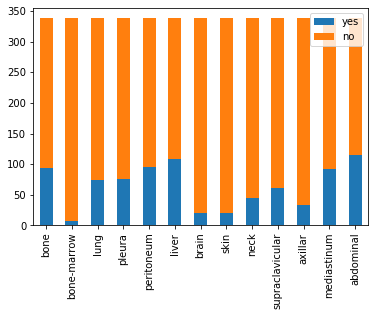

In [28]:
yes = (Dataset == 'Yes').sum()
no = (Dataset == 'No').sum()
tumour_graph = pd.concat([yes,no], axis = 1, keys= ['yes','no'])
ax = tumour_graph.plot.bar(stacked = True)
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def extract(rules, filter= "All", min_element=1):
    # rules: a list containing the association rules.
    # filter: default value is 'all'; however, you can filter out any RHS item
    # min_element: default value is 1, it defines the minimum number of elements in each rule
    """
    extract function accepts a list of association rules and the above parameters, and shows the extracted rules 
    and returns the related metrics and the extracted rules.
    """
    LHS_list = []
    RHS_list = []
    support = []
    confidence = []
    lift = []
    for relation_record in rules:
        num_of_rules = len(relation_record[2])
        for itemset in range(num_of_rules):
            LHS_list.append(list(relation_record[2][itemset][0]))
            RHS_list.append(list(relation_record[2][itemset][1]))
            support.append(relation_record[1])
            confidence.append(relation_record[2][itemset][2])
            lift.append(relation_record[2][itemset][3])
    associationRules = []
    for rule in range(len(LHS_list)):
        if len(LHS_list[rule]) + len(RHS_list[rule]) < min_element:
            continue
        if (filter == 'All') | (filter in RHS_list[rule]):
            associationRules.append([LHS_list[rule], RHS_list[rule], support[rule], confidence[rule], lift[rule]])
    return associationRules
    

def data_prepare(dataset, filter='All'):
    # dataset is a dataframe where each columns 
    # is an item, and each value is either yes or no to show whether an item exists in a transaction.
    # filter: default value is 'All'; however, it is possible to filter out transactions containing a specific item.
    """
    data_prepare accepts a dataframe and a given filter and returns a list of lists containig
    item sets in all transactions.
    """
    transactions = []
    columns = dataset.columns.tolist()
    for row in dataset.iterrows():
        tr = []
        for col in columns:
            if row[1][col] == 'Yes':
                tr.append(col)
        if (filter== 'All') | (filter in tr):
            transactions.append(tr)
    return transactions
    
def plot(supp, conf, lif):
    # supp: a list of calculated supports of the extracted rules.
    # conf: a list of calculated confidence of the extracted rules.
    # lif: a list of calculated lifts of the extracted rules.
    
    x = np.array(supp)
    y = np.array(conf)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    colors = np.array(lif)
    plt.scatter(x, y, c=colors, cmap='CMRmap')
    plt.colorbar()
    plt.show()

def inspect(rules):
    print("The number of associated rules:",len(rules))
    if len(rules) == 0:
        return
    for rule in rules:
        print("LHS: "+ str(rule[0])+" -->"+" RHS:"+ str(rule[1])+ ", support: "+ "{:.2f}".format(rule[2]) +", confidence: " + "{:.2f}".format(rule[3]) +", lift: "+ "{:.2f}".format(rule[4]))
        print(20*"----")

In [30]:
Tumour = data_prepare(Dataset)

In [31]:
#creating rules

from apyori import apriori
rules = list(apriori(Tumour, min_support = 0.01, min_confidence = 0.1))
associationrules = extract(rules)
rules_df = pd.DataFrame(associationrules, columns=['LHS','RHS', 'Support', 'confidence', 'Lift'])
len(rules_df)

1197

In [32]:
rules_df

,LHS,RHS,Support,confidence,Lift
0,[],[abdominal],0.340237,0.340237,1.000000
1,[],[bone],0.278107,0.278107,1.000000
2,[],[liver],0.322485,0.322485,1.000000
3,[],[lung],0.218935,0.218935,1.000000
4,[],[mediastinum],0.272189,0.272189,1.000000
...,...,...,...,...,...
1192,"[pleura, lung, mediastinum, abdominal, liver]",[peritoneum],0.011834,0.571429,2.033083
1193,"[pleura, lung, abdominal, peritoneum, liver]",[mediastinum],0.011834,0.800000,2.939130
1194,"[pleura, mediastinum, abdominal, peritoneum, l...",[lung],0.011834,1.000000,4.567568
1195,"[pleura, lung, mediastinum, abdominal, periton...",[liver],0.011834,1.000000,3.100917


In [33]:
rules_df.nlargest(10, 'Lift')

,LHS,RHS,Support,confidence,Lift
1105,"[mediastinum, abdominal, bone]","[lung, liver, pleura]",0.011834,0.400000,15.022222
1120,"[lung, pleura, liver]","[abdominal, mediastinum, bone]",0.011834,0.444444,15.022222
663,"[axillar, supraclavicular]","[lung, neck]",0.011834,0.235294,13.254902
664,"[lung, neck]","[axillar, supraclavicular]",0.011834,0.666667,13.254902
662,"[axillar, neck]","[lung, supraclavicular]",0.011834,0.444444,12.518519
665,"[lung, supraclavicular]","[axillar, neck]",0.011834,0.333333,12.518519
1159,"[pleura, liver, abdominal]","[lung, peritoneum, mediastinum]",0.011834,0.222222,12.518519
1172,"[lung, peritoneum, mediastinum]","[liver, pleura, abdominal]",0.011834,0.666667,12.518519
1182,"[lung, mediastinum, peritoneum, abdominal]","[liver, pleura]",0.011834,0.800000,11.756522
1149,"[pleura, liver]","[lung, peritoneum, abdominal, mediastinum]",0.011834,0.173913,11.756522


In [34]:
rules_df.nlargest(10, 'Support')

,LHS,RHS,Support,confidence,Lift
0,[],[abdominal],0.340237,0.340237,1.000000
2,[],[liver],0.322485,0.322485,1.000000
6,[],[peritoneum],0.281065,0.281065,1.000000
1,[],[bone],0.278107,0.278107,1.000000
4,[],[mediastinum],0.272189,0.272189,1.000000
7,[],[pleura],0.221893,0.221893,1.000000
3,[],[lung],0.218935,0.218935,1.000000
13,[],"[liver, abdominal]",0.195266,0.195266,1.000000
14,[abdominal],[liver],0.195266,0.573913,1.779657
15,[liver],[abdominal],0.195266,0.605505,1.779657


In [38]:
rules_df.nlargest(10, 'confidence')

,LHS,RHS,Support,confidence,Lift
158,"[brain, peritoneum]",[abdominal],0.011834,1.0,2.939130
230,"[skin, abdominal]",[peritoneum],0.011834,1.0,3.557895
273,"[axillar, neck]",[supraclavicular],0.026627,1.0,5.540984
279,"[bone-marrow, mediastinum]",[bone],0.011834,1.0,3.595745
453,"[lung, liver, bone]",[abdominal],0.023669,1.0,2.939130
501,"[lung, peritoneum, bone]",[abdominal],0.014793,1.0,2.939130
559,"[lung, pleura, liver]",[abdominal],0.026627,1.0,2.939130
594,"[pleura, liver, peritoneum]",[abdominal],0.029586,1.0,2.939130
667,"[axillar, lung, neck]",[supraclavicular],0.011834,1.0,5.540984
679,"[axillar, mediastinum, neck]",[supraclavicular],0.014793,1.0,5.540984


In [39]:
inspect(associationrules)

The number of associated rules: 1197
LHS: [] --> RHS:['abdominal'], support: 0.34, confidence: 0.34, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['bone'], support: 0.28, confidence: 0.28, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['liver'], support: 0.32, confidence: 0.32, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['lung'], support: 0.22, confidence: 0.22, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['mediastinum'], support: 0.27, confidence: 0.27, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['neck'], support: 0.13, confidence: 0.13, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['peritoneum'], support: 0.2

In [43]:
rules_df[rules_df['LHS'].apply(lambda x: len(x)>0)].nlargest(10, 'Support')

,LHS,RHS,Support,confidence,Lift
14,[abdominal],[liver],0.195266,0.573913,1.779657
15,[liver],[abdominal],0.195266,0.605505,1.779657
20,[abdominal],[mediastinum],0.133136,0.391304,1.437618
21,[mediastinum],[abdominal],0.133136,0.489130,1.437618
24,[abdominal],[peritoneum],0.133136,0.391304,1.392220
25,[peritoneum],[abdominal],0.133136,0.473684,1.392220
72,[liver],[mediastinum],0.115385,0.357798,1.314519
73,[mediastinum],[liver],0.115385,0.423913,1.314519
75,[liver],[peritoneum],0.115385,0.357798,1.273008
76,[peritoneum],[liver],0.115385,0.410526,1.273008


In [45]:
rules_df.nlargest(10, 'confidence')

,LHS,RHS,Support,confidence,Lift
158,"[brain, peritoneum]",[abdominal],0.011834,1.0,2.939130
230,"[skin, abdominal]",[peritoneum],0.011834,1.0,3.557895
273,"[axillar, neck]",[supraclavicular],0.026627,1.0,5.540984
279,"[bone-marrow, mediastinum]",[bone],0.011834,1.0,3.595745
453,"[lung, liver, bone]",[abdominal],0.023669,1.0,2.939130
501,"[lung, peritoneum, bone]",[abdominal],0.014793,1.0,2.939130
559,"[lung, pleura, liver]",[abdominal],0.026627,1.0,2.939130
594,"[pleura, liver, peritoneum]",[abdominal],0.029586,1.0,2.939130
667,"[axillar, lung, neck]",[supraclavicular],0.011834,1.0,5.540984
679,"[axillar, mediastinum, neck]",[supraclavicular],0.014793,1.0,5.540984


In [46]:
rules_df.nlargest(10, 'Lift')

,LHS,RHS,Support,confidence,Lift
1105,"[mediastinum, abdominal, bone]","[lung, liver, pleura]",0.011834,0.400000,15.022222
1120,"[lung, pleura, liver]","[abdominal, mediastinum, bone]",0.011834,0.444444,15.022222
663,"[axillar, supraclavicular]","[lung, neck]",0.011834,0.235294,13.254902
664,"[lung, neck]","[axillar, supraclavicular]",0.011834,0.666667,13.254902
662,"[axillar, neck]","[lung, supraclavicular]",0.011834,0.444444,12.518519
665,"[lung, supraclavicular]","[axillar, neck]",0.011834,0.333333,12.518519
1159,"[pleura, liver, abdominal]","[lung, peritoneum, mediastinum]",0.011834,0.222222,12.518519
1172,"[lung, peritoneum, mediastinum]","[liver, pleura, abdominal]",0.011834,0.666667,12.518519
1182,"[lung, mediastinum, peritoneum, abdominal]","[liver, pleura]",0.011834,0.800000,11.756522
1149,"[pleura, liver]","[lung, peritoneum, abdominal, mediastinum]",0.011834,0.173913,11.756522


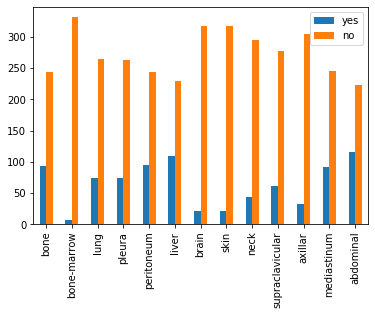

In [47]:
ax = tumour_graph.plot.bar()
plt.show()

In [48]:
#creating rules

from apyori import apriori
rules = list(apriori(Tumour, min_support = 0.01, min_confidence = 0.1))
associationrules = extract(rules, 'liver', 2)

inspect(associationrules)

The number of associated rules: 299
LHS: [] --> RHS:['liver', 'abdominal'], support: 0.20, confidence: 0.20, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['abdominal'] --> RHS:['liver'], support: 0.20, confidence: 0.57, lift: 1.78
--------------------------------------------------------------------------------
LHS: ['axillar'] --> RHS:['liver'], support: 0.01, confidence: 0.15, lift: 0.47
--------------------------------------------------------------------------------
LHS: ['bone'] --> RHS:['liver'], support: 0.05, confidence: 0.18, lift: 0.56
--------------------------------------------------------------------------------
LHS: ['brain'] --> RHS:['liver'], support: 0.01, confidence: 0.24, lift: 0.74
--------------------------------------------------------------------------------
LHS: ['lung'] --> RHS:['liver'], support: 0.09, confidence: 0.41, lift: 1.26
--------------------------------------------------------------------------------
